# Churn Analysis in SyriaTel Communication Company

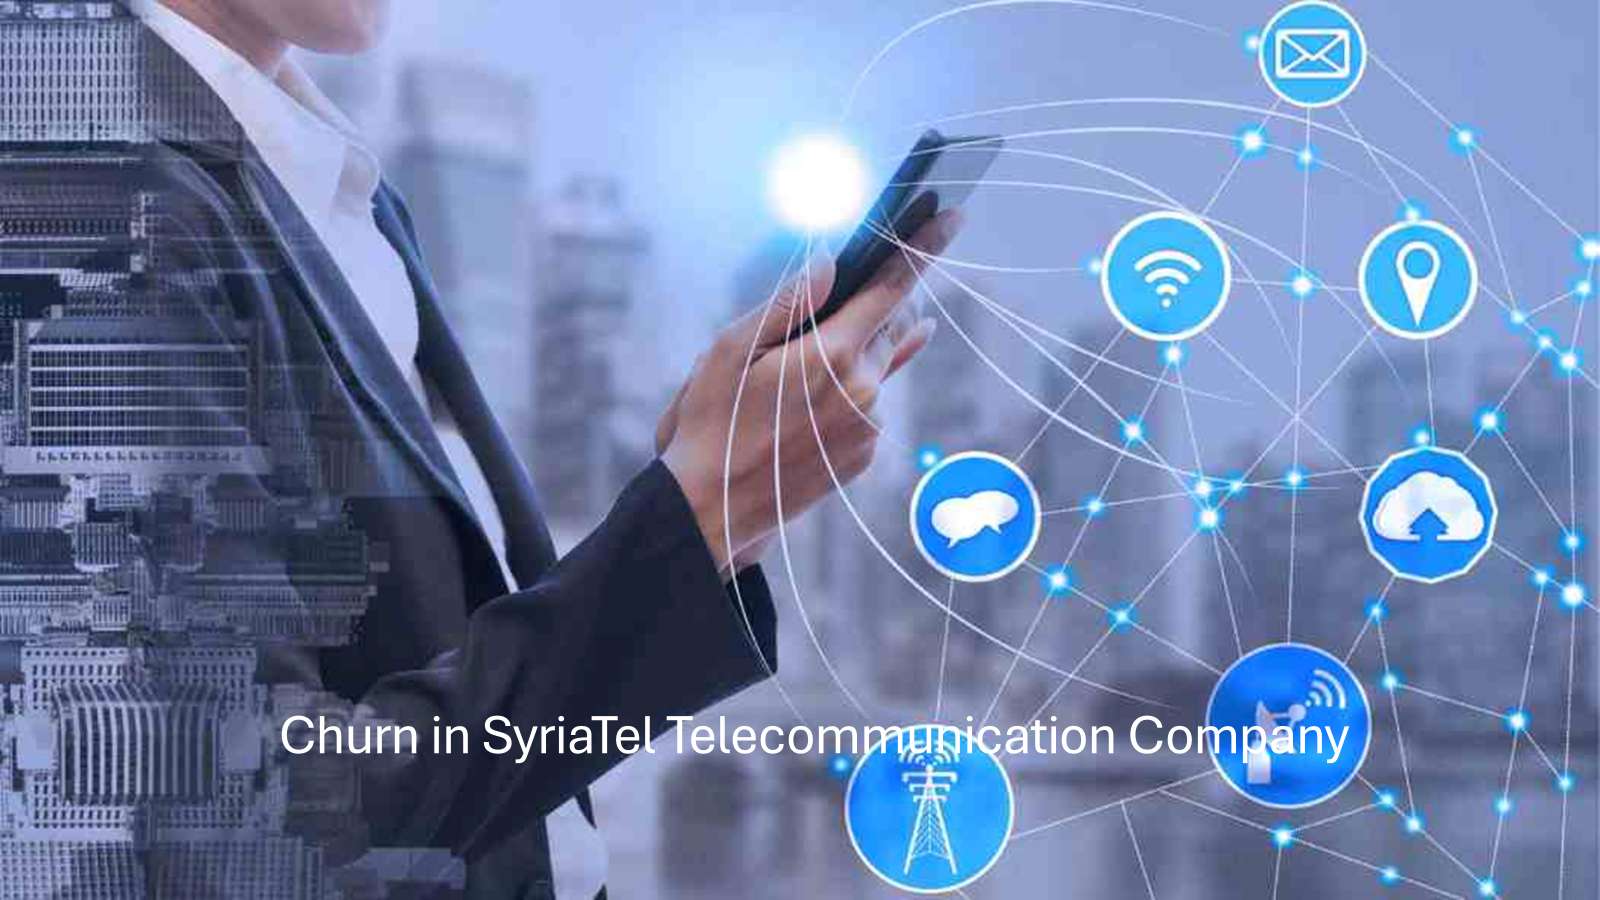

# Overview
The data set and analysis that we will undertake in this project relates to SyriaTel Telecommunication company and the aim is to predict the likelihood of a customer churning.
The data includes demographic and usage-related features such as call duration during different times (day, evening, night), customer service calls, and whether the customer has specific plans like international or voicemail. The target variable, churn, is binary (Yes/No). Initial analysis reveals key trends: customers with high service interactions or unusual usage patterns may be more likely to churn. The dataset offers opportunities for understanding customer behavior and identifying actionable insights to improve retention strategies.

# 1. Business Understanding

In the telecommunications industry, churn refers to the number of customers who were previously active and are no longer using the services of the telecommunication company. A lot of efforts and resources are used to acquire customers and therefore the need to ensure that the customers stay with the company for as long as possible. 
A number of stakeholders are interested in understanding churn in a company. These stakeholders include;

### a) Sales and marketing team
- To inform the quality of customer acquisitions as this has a direct correlation with churn
- To understand sales regions with the best quality and opportunity for customer acquisition
- To inform what services to offer in order to drive customer loyalty
- To craft win back campaigns for customers who are about to churn or have churned.

### b). Finance team
- To understand the cost of acquisition versus the cost of churn and optimize the net cost of acquisition.
- For periodical financial and management reporting
- To understand and provide for the cost of customer loyalty

### c). Industry
- Tracking the growth of the industry and market share statistics for the telecommunications operators

### d). Shareholders
- To understand the annual growth of the company

## Business Problems to be Solved
A model to predict the likehood of churn will solve the following problems;
- Identification of customers likely to churn and coming up with interventions before the churn materializes.
- Understanding what factors contribute most to churn.
- Developing customer retention strategies such as targeted products and services offering.
- Understanding the risk of churn in different customer segments and informing segment specific strategies for retention.

## Problems inside the project
In this project, we will dvelop a predictive model to determine whether a customer will churn (binary classification: Yes/No) based on customer usage patterns, interaction with the company, and plan features.

The expected outcome will be actionable insights to SyriaTel on how to reduce customer churn by identifying high-risk customers and enabling targeted retention strategies.

The measure of success will involve evaluating the model's performance using metrics such as:
- Accuracy: Measures overall correctness but may not address class imbalance.
- Precision: Useful when minimizing false positives (e.g., targeting non-churners for retention campaigns is costly).
- Recall: Important to identify as many churners as possible (minimizing false negatives).
- F1-Score: Balances Precision and Recall, suitable for imbalanced datasets.
- AUC-ROC: Evaluates the tradeoff between true positive and false positive rates across thresholds.

# 2. Data Collection

 - The source of data for this project is from dataset in Kaggle and includes the following variables, customer details such as demographics, account attributes, and usage metrics critical for predicting churn.
- The format of the is a .CSV (Comma-Separated Values).
- The link to the dataset is (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

# 3.1 Data Understanding
We unpack the SyriaTel churn dataset to understand its structure, content of the data and the relationship between the variables. We look at the type of data and what is included in the columns, identify patterns, check for missing values, and understand the distribution of variables. The aim is to familiarize ourselves with the data before any analysis or modeling, ensuring that we can make informed decisions and address any issues, such as imbalances or outliers, that might affect the results.

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Loading data

df_churn = pd.read_csv('SyriaTel_Churn.csv')
df_churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Description of the columns
- state: The state in which the customer resides.
- account length: The duration (in months) the customer has had an account with the service provider.
- area code: The area code associated with the customer's phone number.
- phone number: The customer's phone number.
- international plan: A binary indicator (yes/no) of whether the customer has an international calling plan.
- voice mail plan: A binary indicator (yes/no) of whether the customer has a voicemail plan.
- number vmail messages: The total number of voicemail messages received by the customer.
- total day minutes: The total number of minutes the customer spent on daytime calls.
- total day calls: The total number of daytime calls made by the customer.
- total day charge: The total charge for daytime calls made by the customer.
- total eve minutes: The total number of minutes the customer spent on evening calls.
- total eve calls: The total number of evening calls made by the customer.
- total eve charge: The total charge for evening calls made by the customer.
- total night minutes: The total number of minutes the customer spent on nighttime calls.
- total night calls: The total number of nighttime calls made by the customer.
- total night charge: The total charge for nighttime calls made by the customer.
- total intl minutes: The total number of minutes the customer spent on international calls.
- total intl calls: The total number of international calls made by the customer.
- total intl charge: The total charge for international calls made by the customer.
- customer service calls: The total number of calls the customer made to customer service.
- churn: A binary indicator (1/0) representing whether the customer has churned (left the service) or not.

In [7]:
df_churn.shape

(3333, 21)

# 3.2 Data Preparation & Cleaning
The actions involved in this stage include;
- Identifying and removing duplicate rows.
- Handling missing/NAN values to ensure data consistency.
- Eliminating irrelevant columns that do not contribute meaningfully to the analysis.

In [8]:
# Checking for duplicates
df_churn.duplicated().sum()

0

In [9]:
# Checking for null values
df_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Dropping unnecessary features - phone number
df_churn.drop(['phone number','area code','state'],axis=1,inplace=True)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Checking the number of categorical columns and the relationship between the target, Churn, and the columns

In [11]:
categoricals = df_churn.select_dtypes("object")

for col in categoricals:
    print(df_churn[col].value_counts(), "\n")

no     3010
yes     323
Name: international plan, dtype: int64 

no     2411
yes     922
Name: voice mail plan, dtype: int64 



international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64


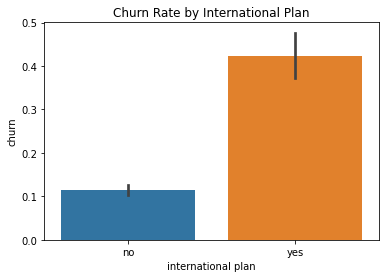

In [12]:
print(df_churn.groupby('international plan')['churn'].mean())
sns.barplot(x='international plan', y='churn', data=df_churn)
plt.title('Churn Rate by International Plan')
plt.show()

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


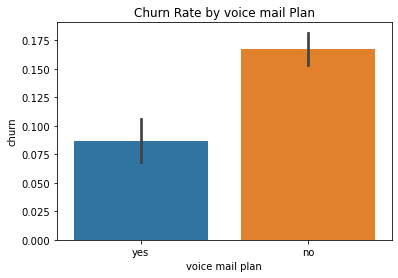

In [13]:
print(df_churn.groupby('voice mail plan')['churn'].mean())
sns.barplot(x='voice mail plan', y='churn', data=df_churn)
plt.title('Churn Rate by voice mail Plan')
plt.show()